# Kaggle - Fraud detection in credit card transactions

## Load Required Packages

In [2]:
required_packages <- c( 
  # Add to this list the packages that you will use - if unavailable, it will be 
  # automatically installed
    "Hmisc",
    "caret",
    "kknn",
    "gbm",
    "randomForest",
    "nnet",
    "xgboost",
    "mlr",
    "parallel",
    "parallelMap",
    "ggplot2",
    "data.table",
    "tidyverse"
    )

packages_to_install <- required_packages[!(required_packages %in% 
                                                installed.packages()[, 1])]
    
if (length(packages_to_install) > 0) {
    install.packages(packages_to_install)
}
    
suppressPackageStartupMessages({
    sapply(required_packages, 
           require, 
           character.only = TRUE)
})

Hmisc        caret         kknn          gbm randomForest         nnet 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
     xgboost          mlr     parallel  parallelMap      ggplot2   data.table 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
   tidyverse 
        TRUE

## Import the data

In [3]:
df <- fread("~/Documents/GitHub/kaggle-creditcards/creditcard.csv") #Use fread() from the data.table package to read in large datasets

### Summary statistics

In [4]:
summary(df)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1799  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139320   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

In [5]:
df <- df %>% 
  data.frame() %>% 
  mutate(Class = as.factor(Class)) ##Convert target variable to categorical type

In [6]:
head(df)

Time V1         V2          V3        V4         V5          V6         
1 0    -1.3598071 -0.07278117 2.5363467  1.3781552 -0.33832077  0.46238778
2 0     1.1918571  0.26615071 0.1664801  0.4481541  0.06001765 -0.08236081
3 1    -1.3583541 -1.34016307 1.7732093  0.3797796 -0.50319813  1.80049938
4 1    -0.9662717 -0.18522601 1.7929933 -0.8632913 -0.01030888  1.24720317
5 2    -1.1582331  0.87773675 1.5487178  0.4030339 -0.40719338  0.09592146
6 2    -0.4259659  0.96052304 1.1411093 -0.1682521  0.42098688 -0.02972755
  V7          V8          V9         ⋯ V21          V22          V23        
1  0.23959855  0.09869790  0.3637870 ⋯ -0.018306778  0.277837576 -0.11047391
2 -0.07880298  0.08510165 -0.2554251 ⋯ -0.225775248 -0.638671953  0.10128802
3  0.79146096  0.24767579 -1.5146543 ⋯  0.247998153  0.771679402  0.90941226
4  0.23760894  0.37743587 -1.3870241 ⋯ -0.108300452  0.005273597 -0.19032052
5  0.59294075 -0.27053268  0.8177393 ⋯ -0.009430697  0.798278495 -0.13745808
6  0.47620095  0.26031433 -0.5686714 ⋯ -0.208253515 -0.559824796 -0.02639767
  V24         V25        V26        V27          V28         Amount Class
1  0.06692807  0.1285394 -0.1891148  0.133558377 -0.02105305 149.62 0    
2 -0.33984648  0.1671704  0.1258945 -0.008983099  0.01472417   2.69 0    
3 -0.68928096 -0.3276418 -0.1390966 -0.055352794 -0.05975184 378.66 0    
4 -1.17557533  0.6473760 -0.2219288  0.062722849  0.06145763 123.50 0    
5  0.14126698 -0.2060096  0.5022922  0.219422230  0.21515315  69.99 0    
6 -0.37142658 -0.2327938  0.1059148  0.253844225  0.08108026   3.67 0

------------------------------------------------------

## Split data into train and test dataset

In [7]:
#Set seed for random sampling
set.seed(42)

trainIndex <- createDataPartition(df$Class, 
                                  p = 0.8, #Proportion of training data
                                  list = FALSE, 
                                  times = 1)

df_train <- df[trainIndex,]
df_test  <- df[-trainIndex,]

In [8]:
#Check proportion of Classes in train and test dataset
table(df_train$Class)/nrow(df_train)
table(df_test$Class)/nrow(df_test)


          0           1 
0.998270762 0.001729238 


          0           1 
0.998279525 0.001720475 

-------------------

## Plot distribution of variables across classes

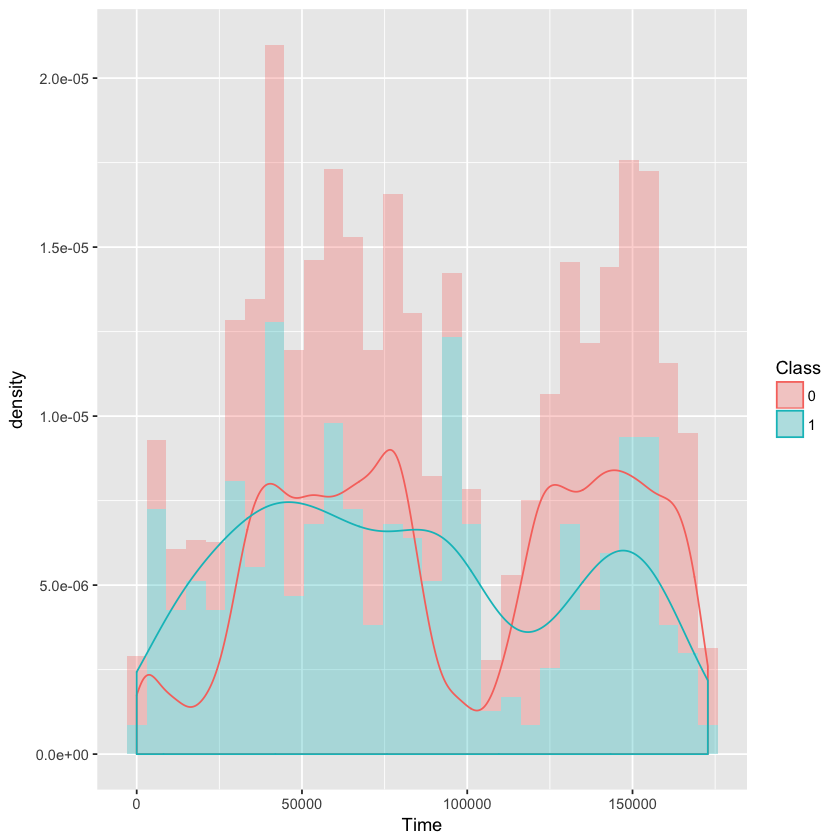

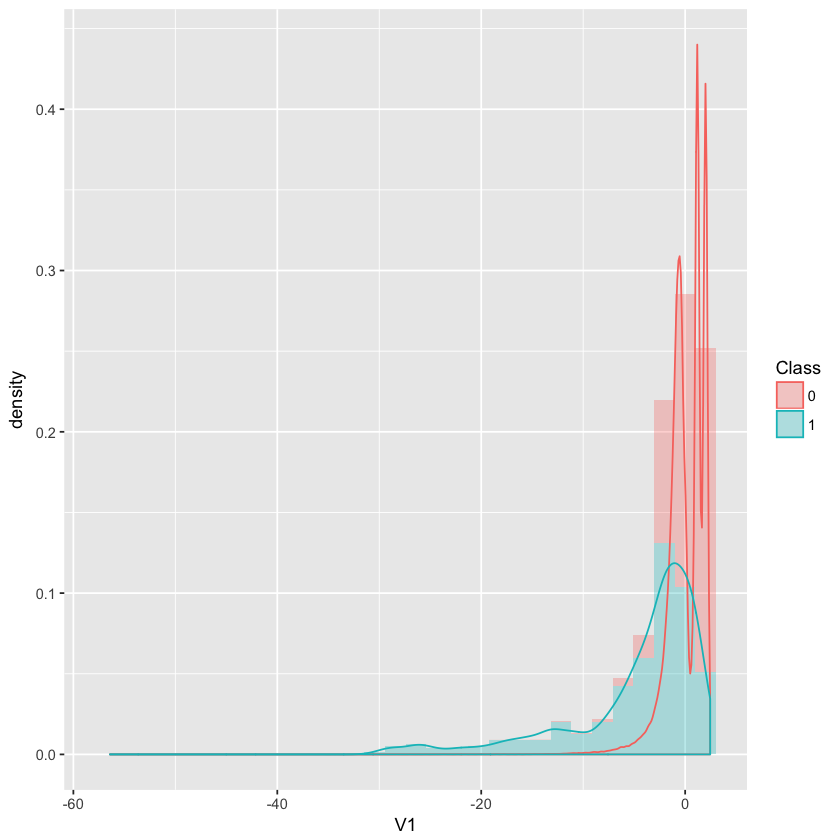

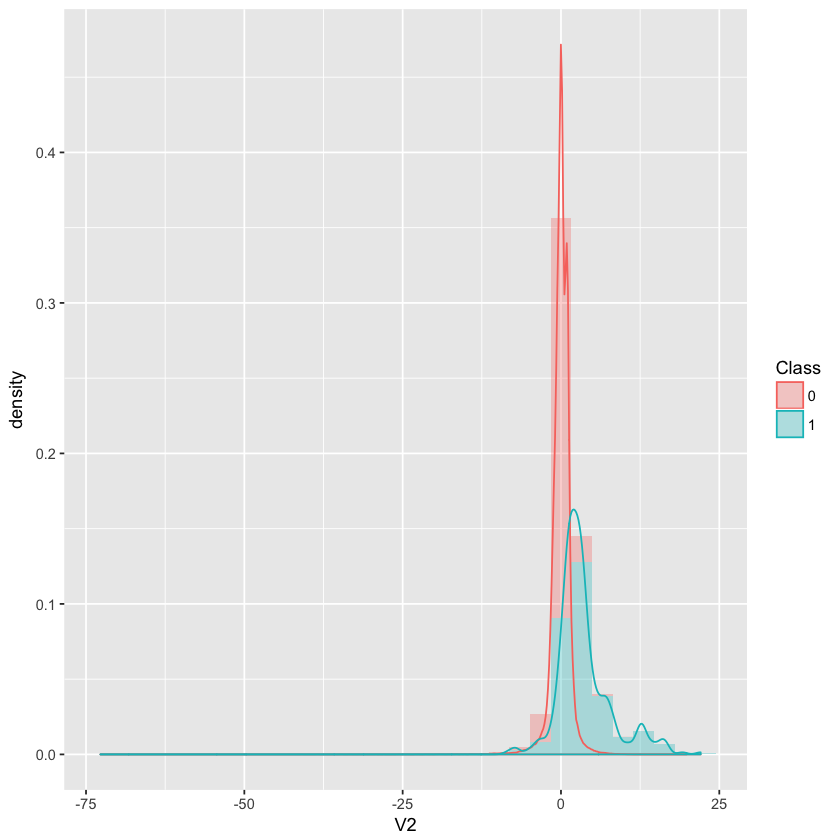

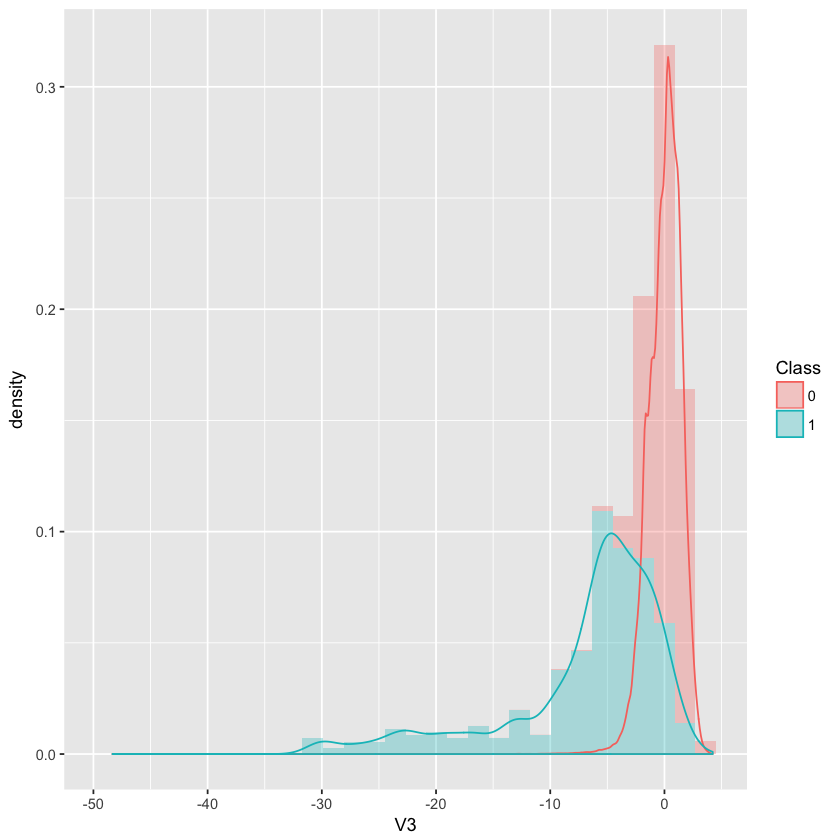

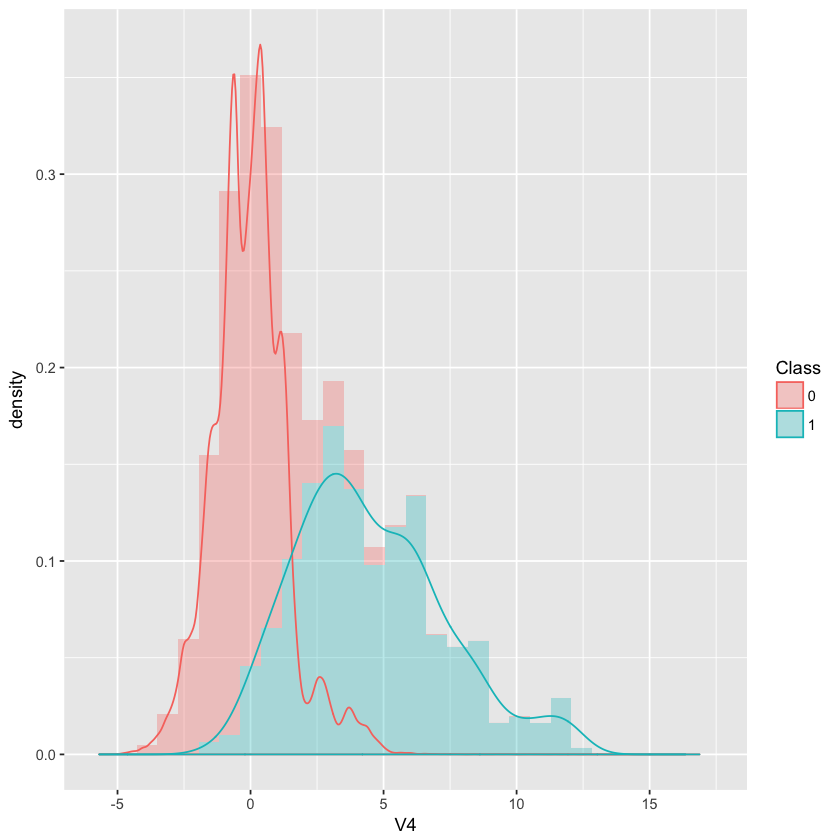

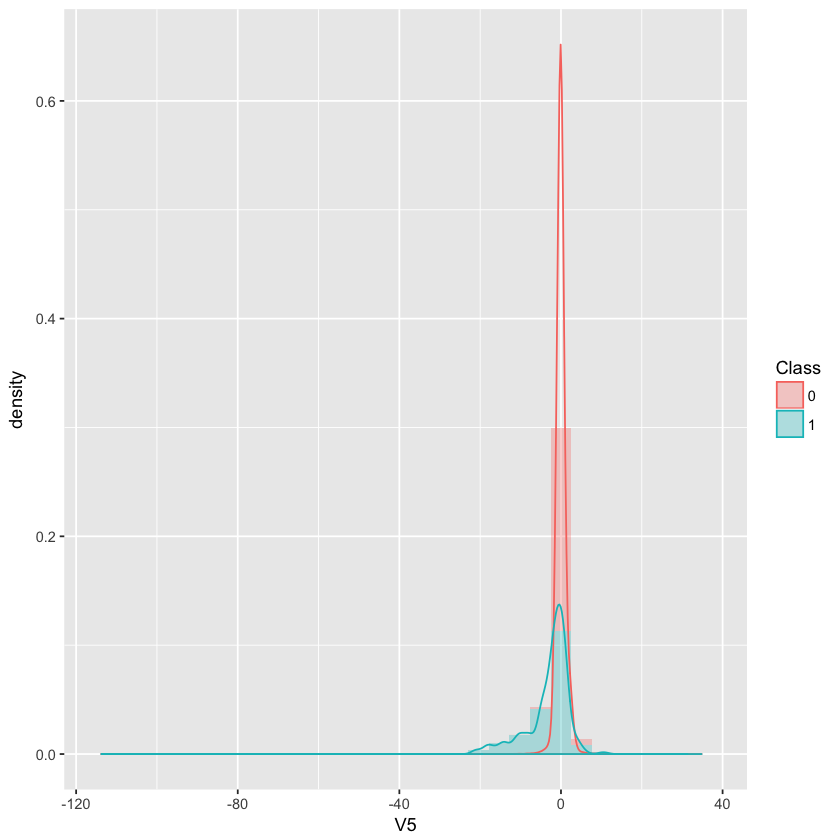

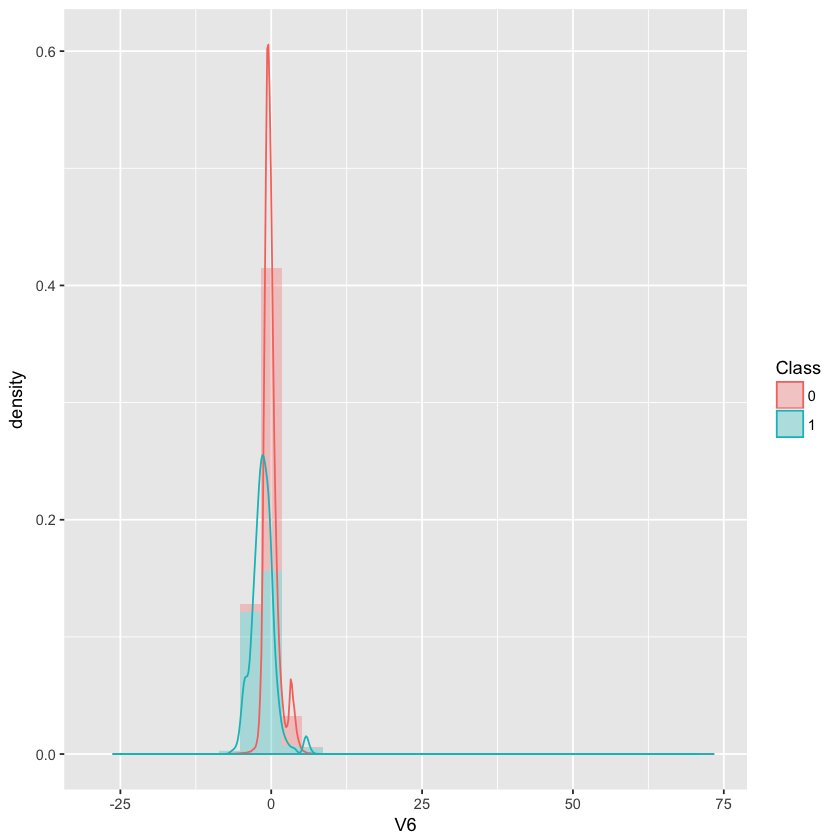

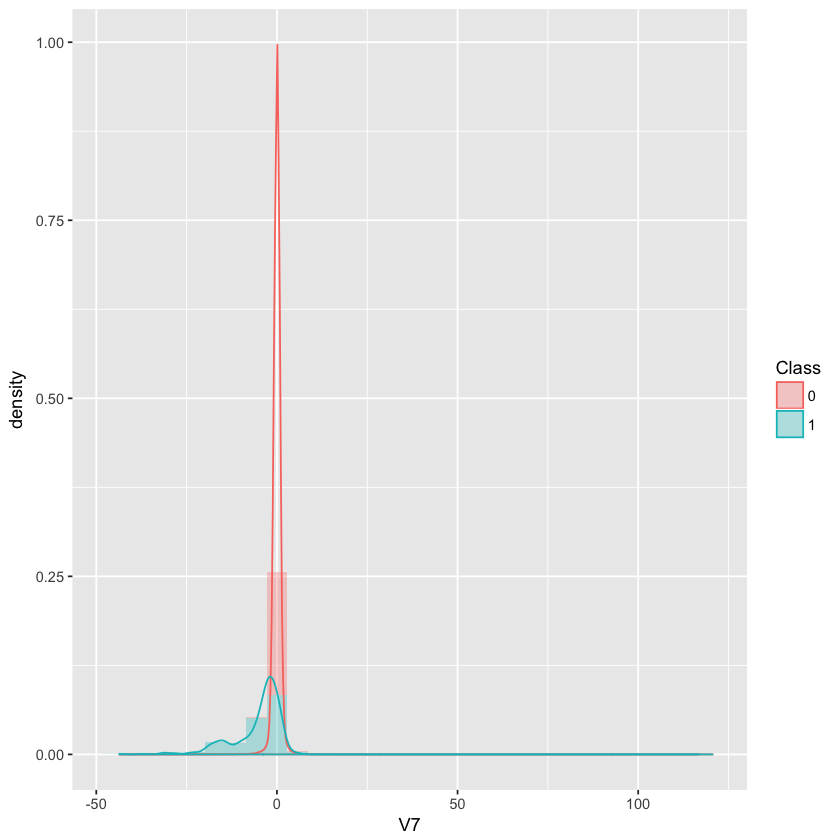

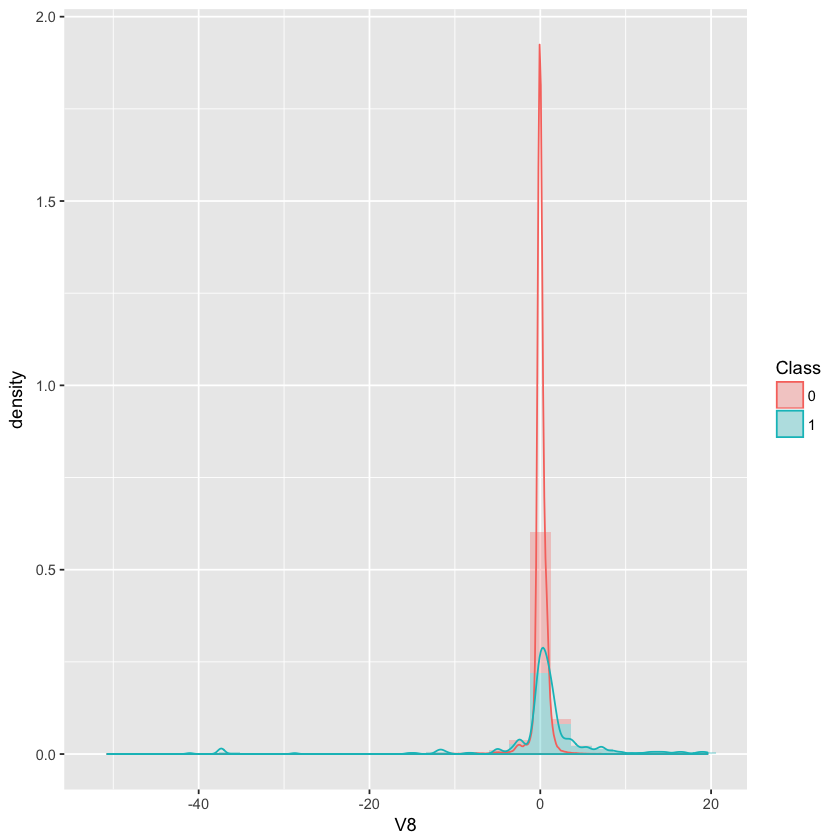

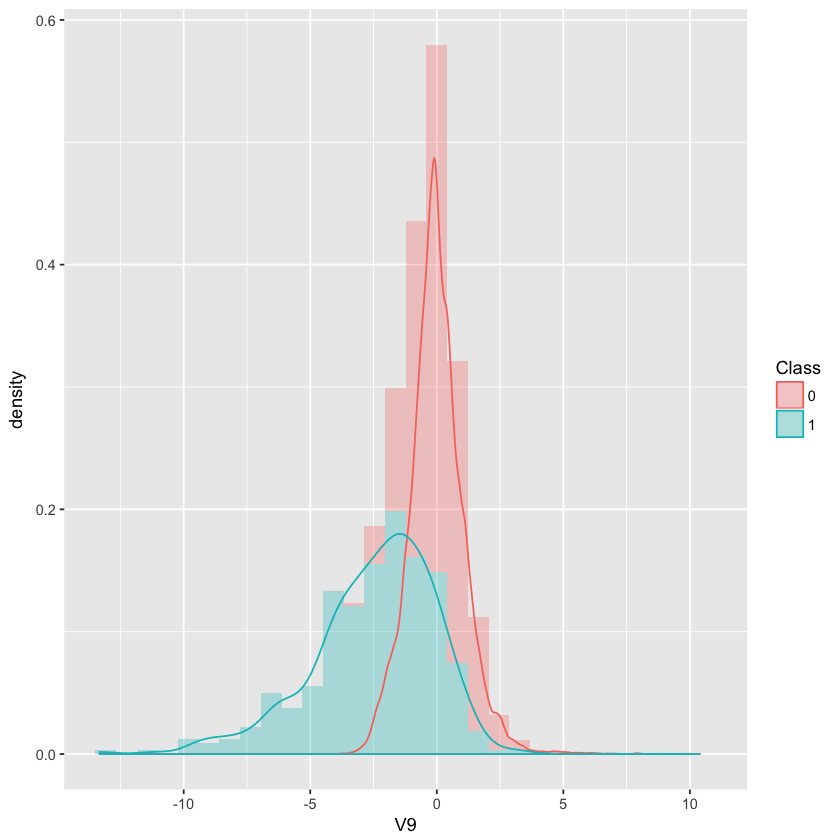

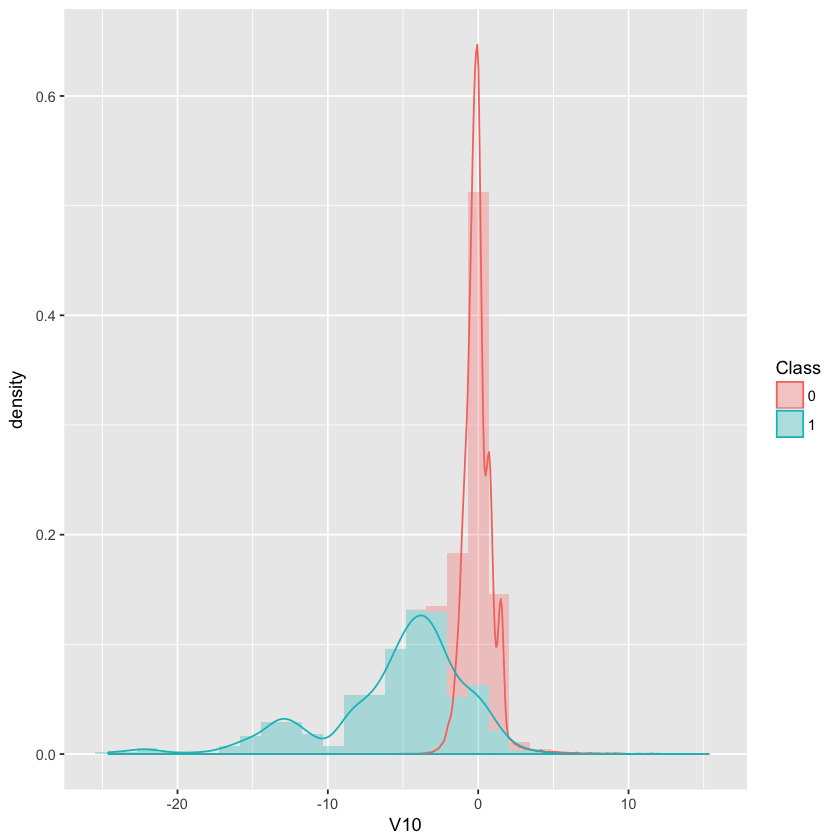

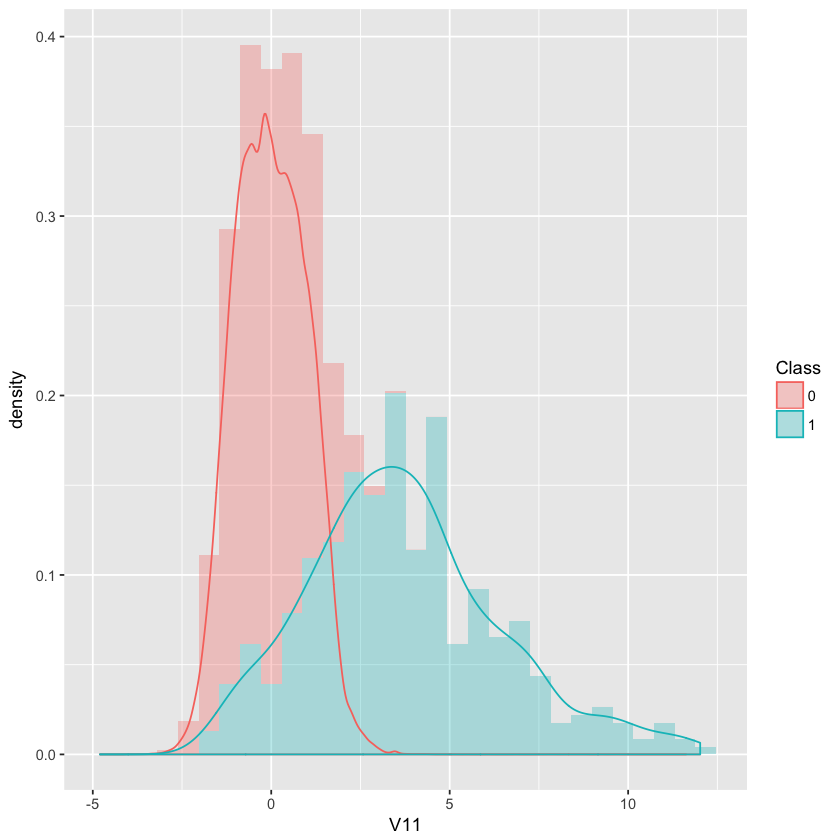

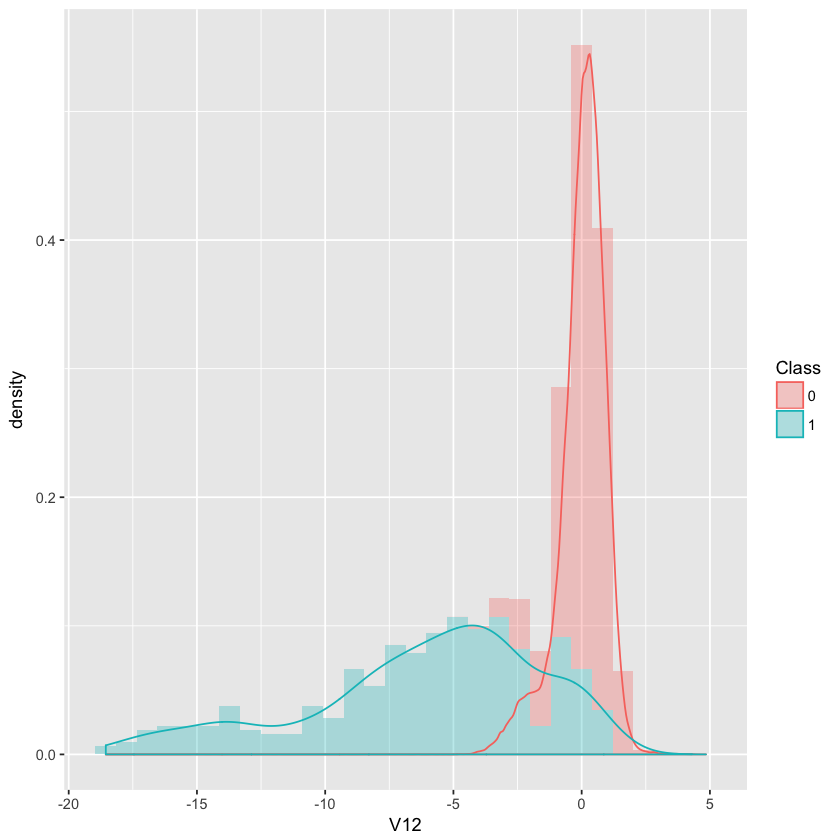

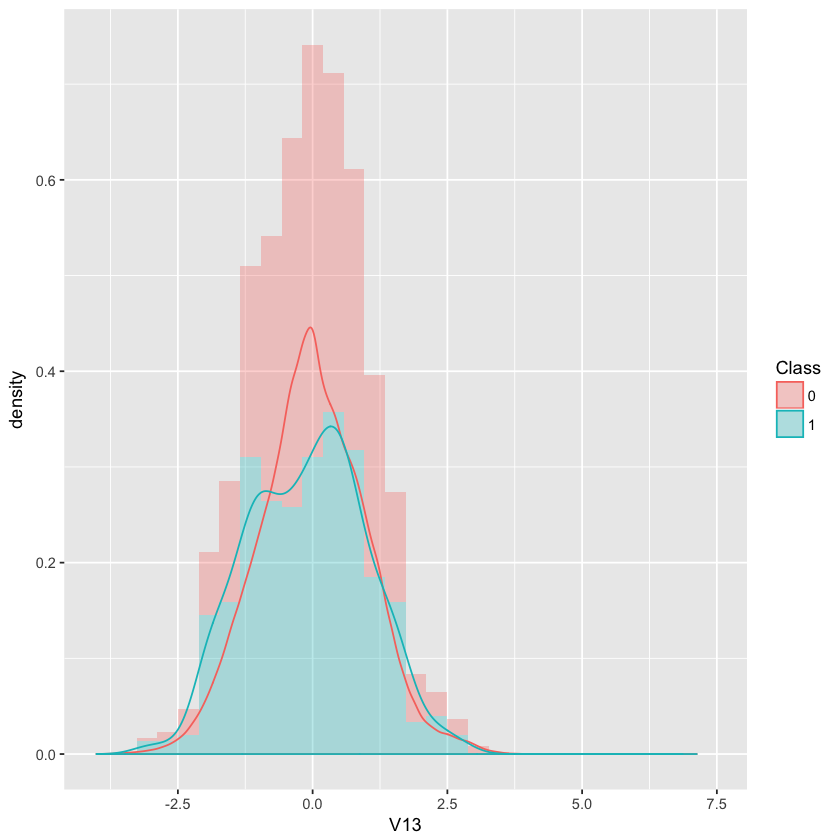

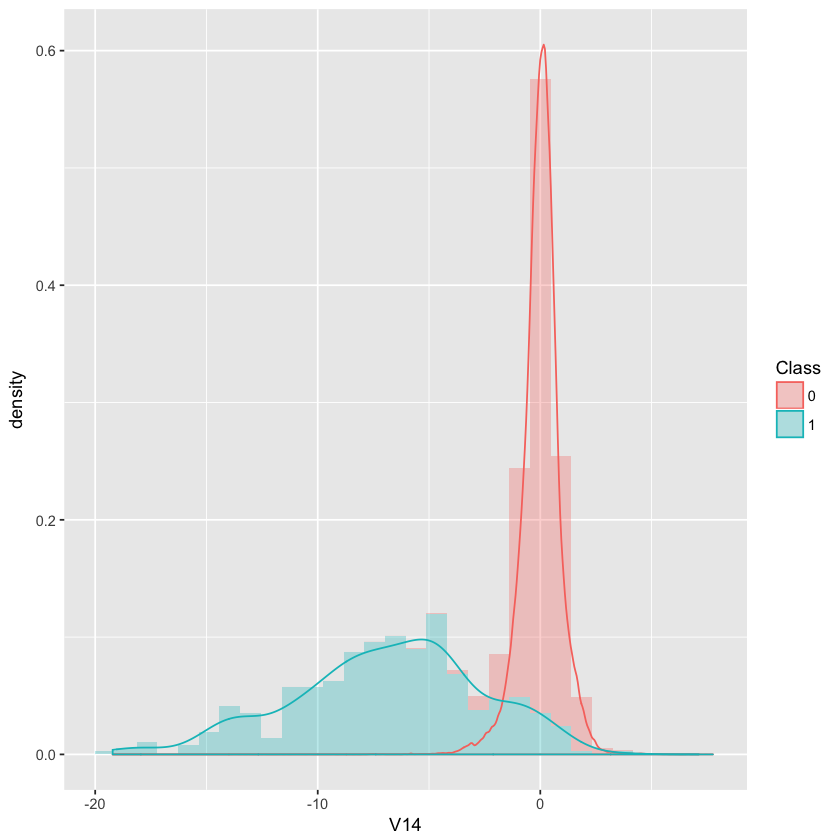

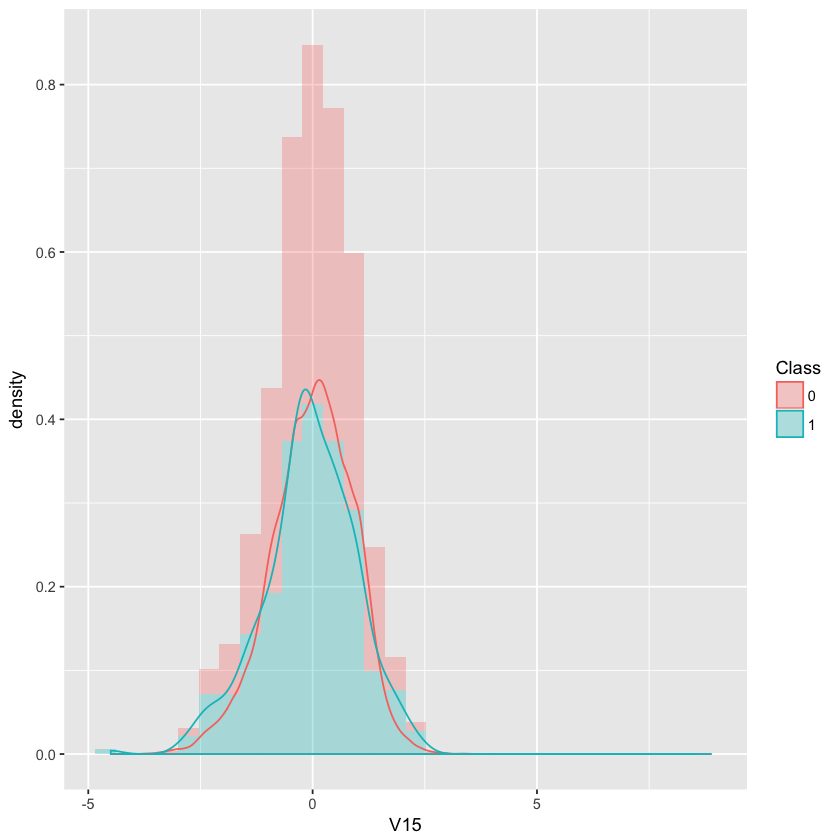

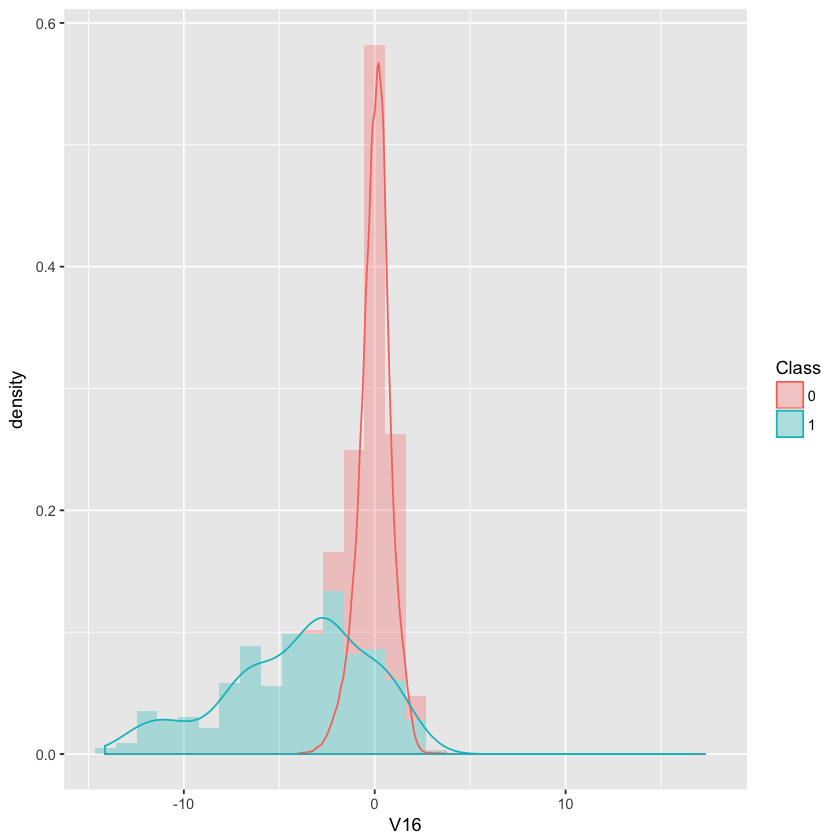

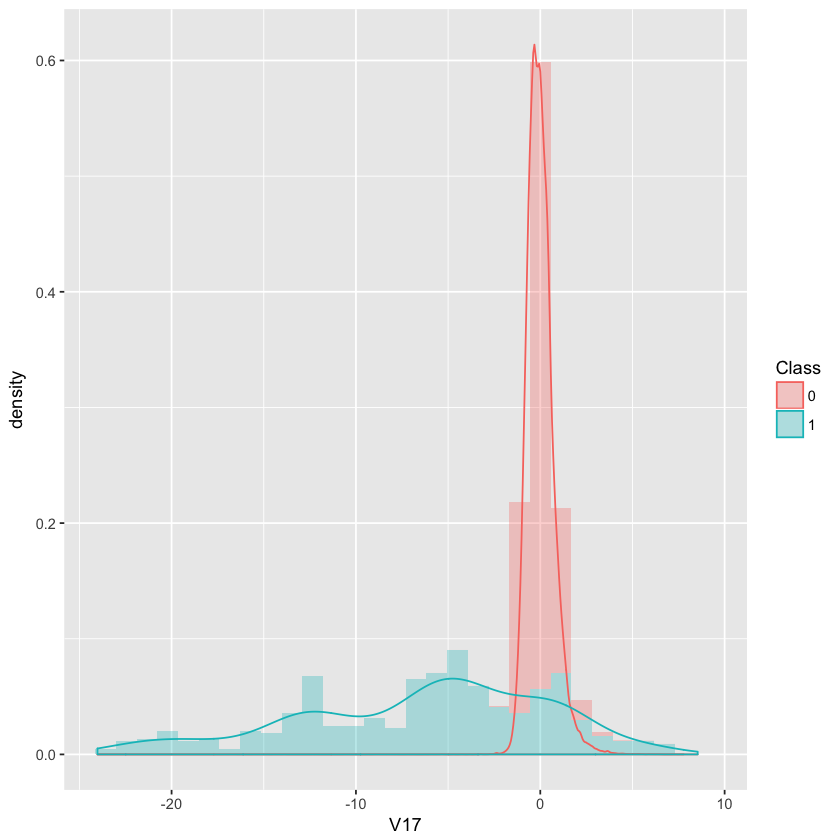

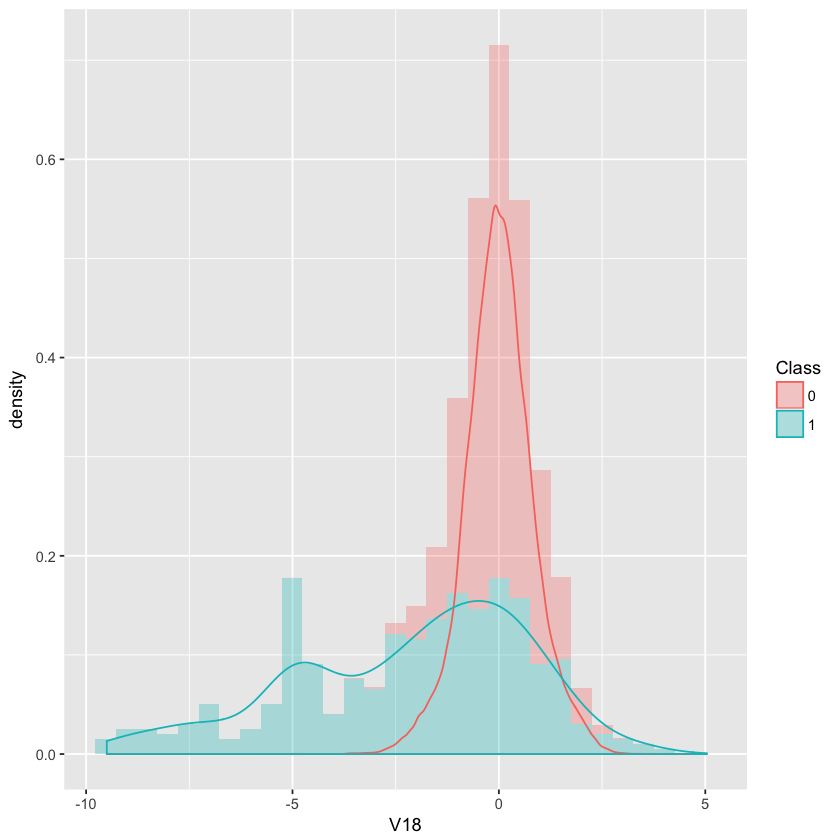

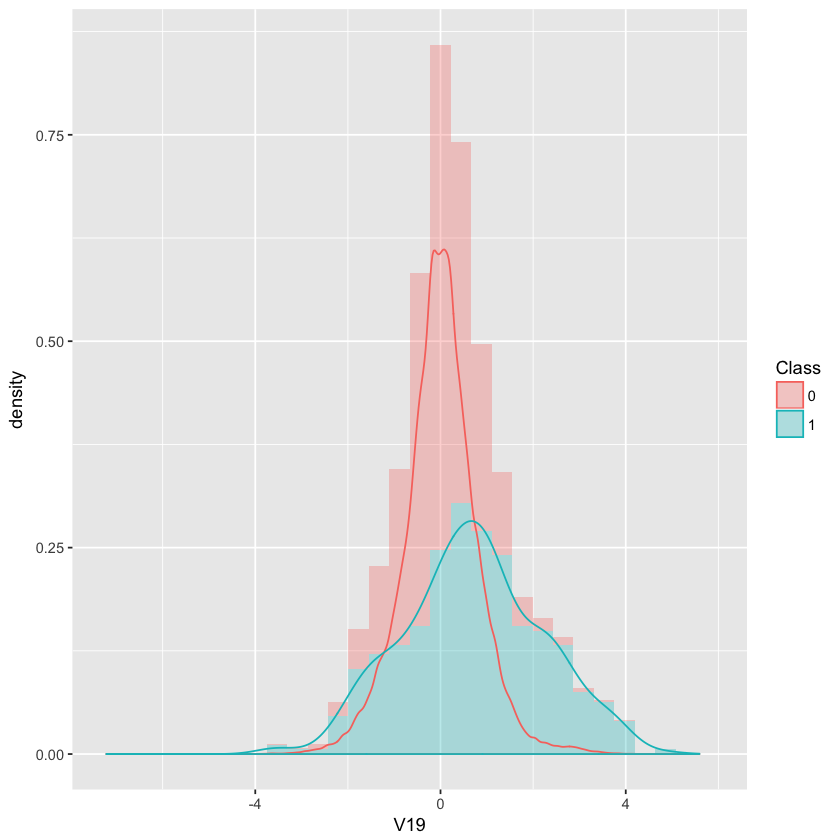

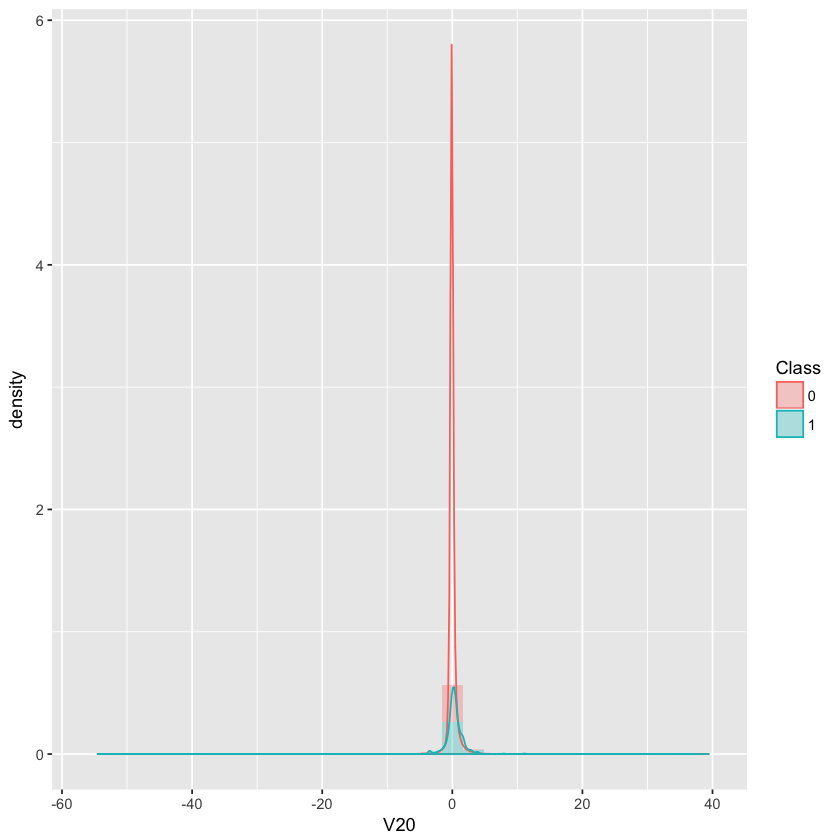

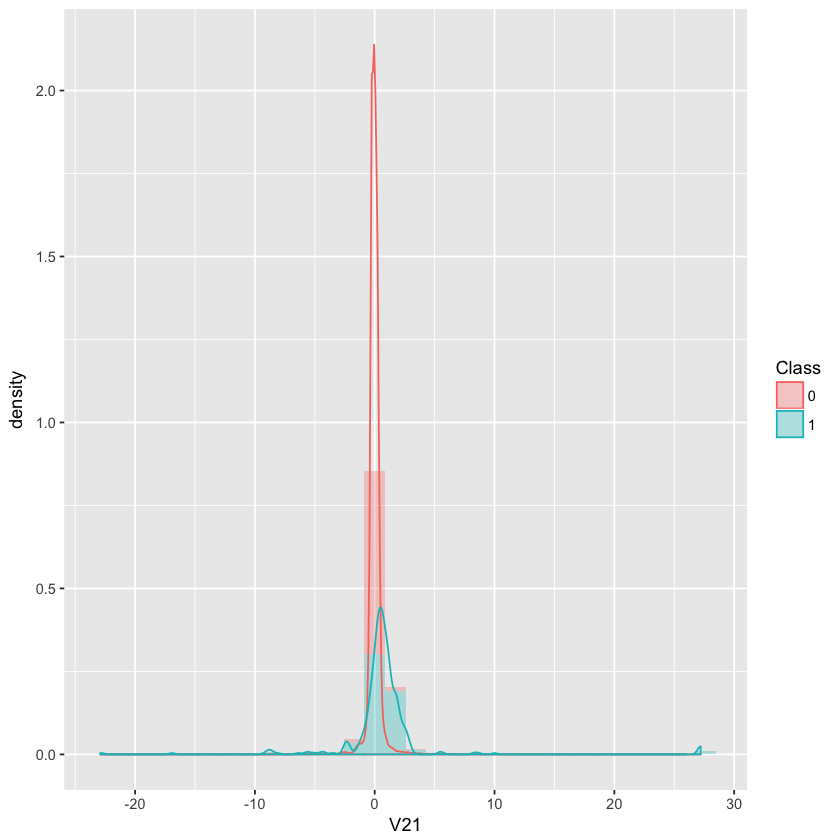

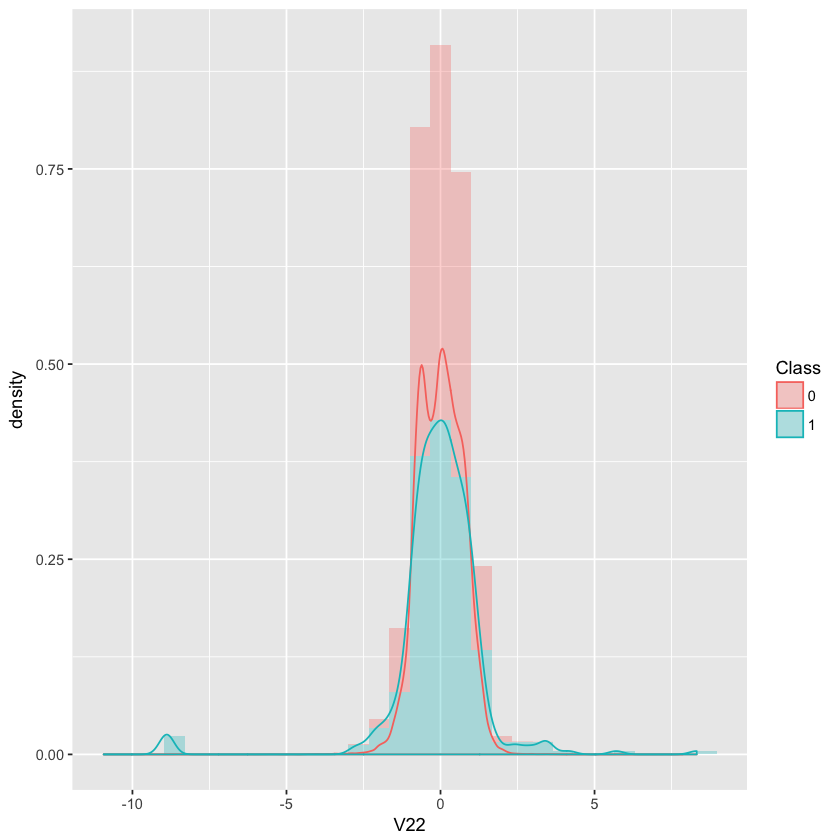

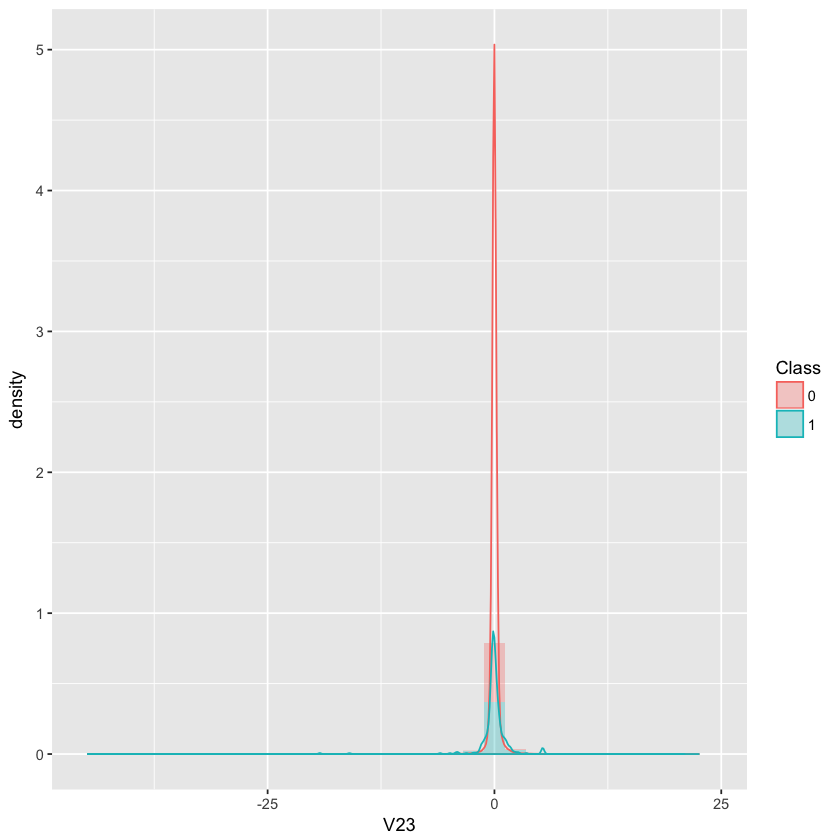

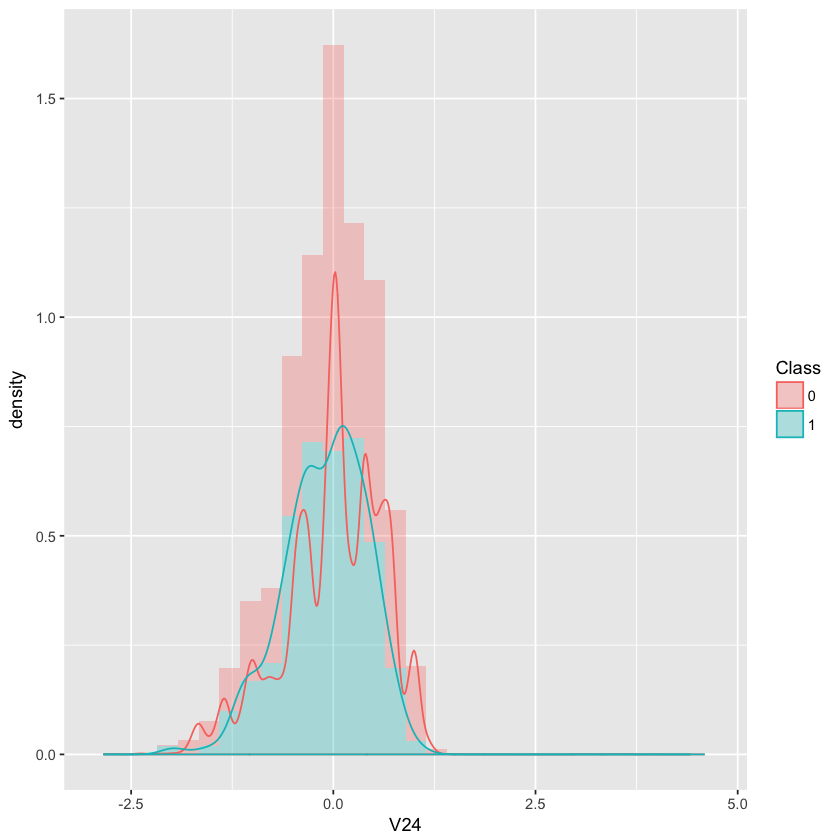

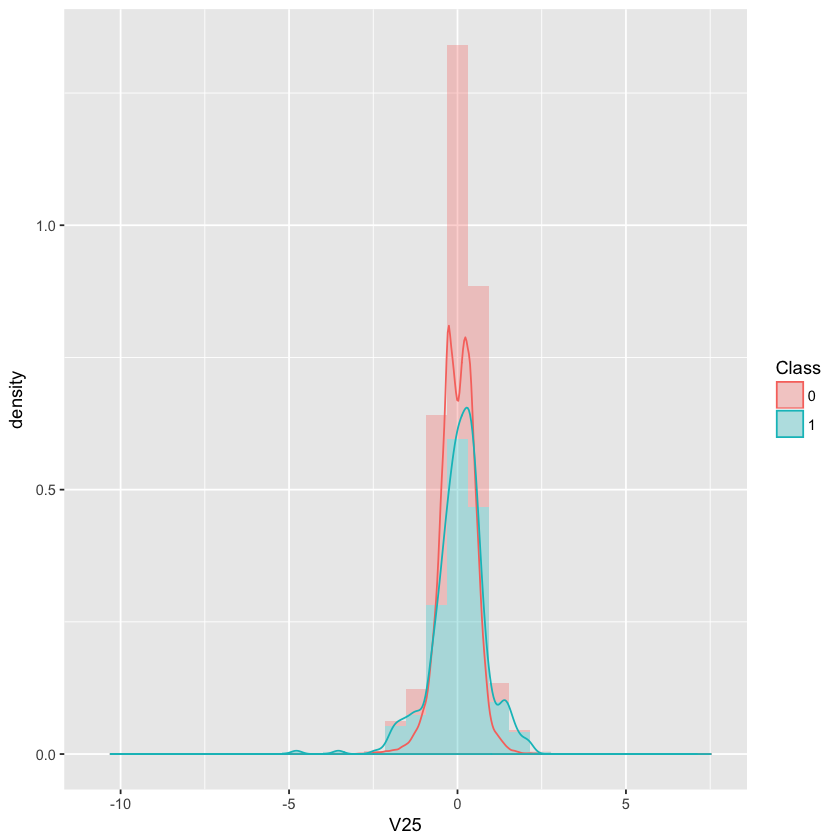

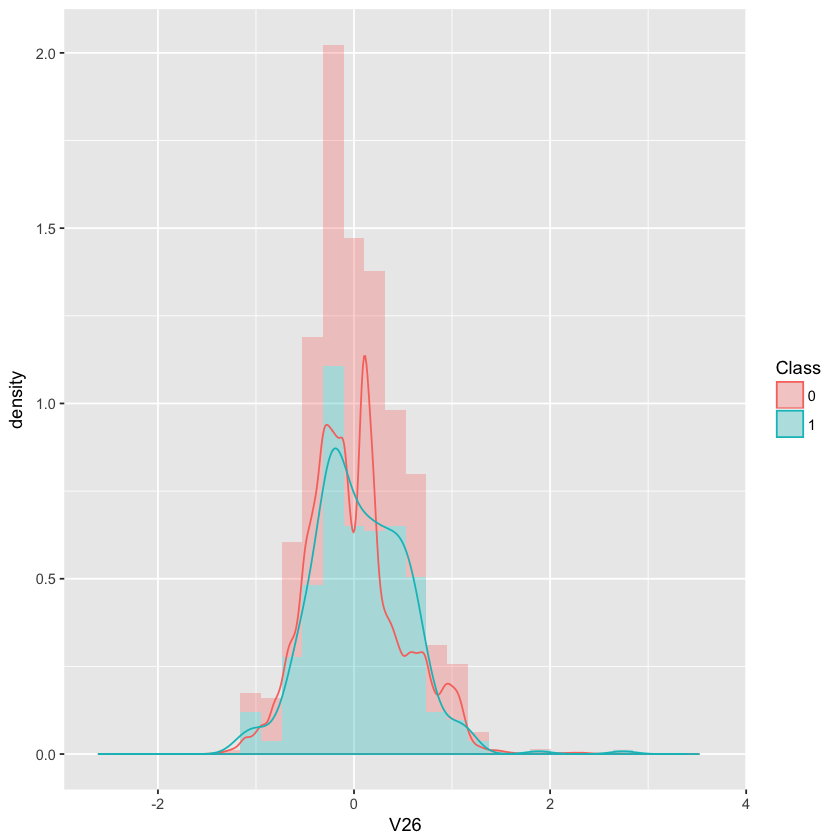

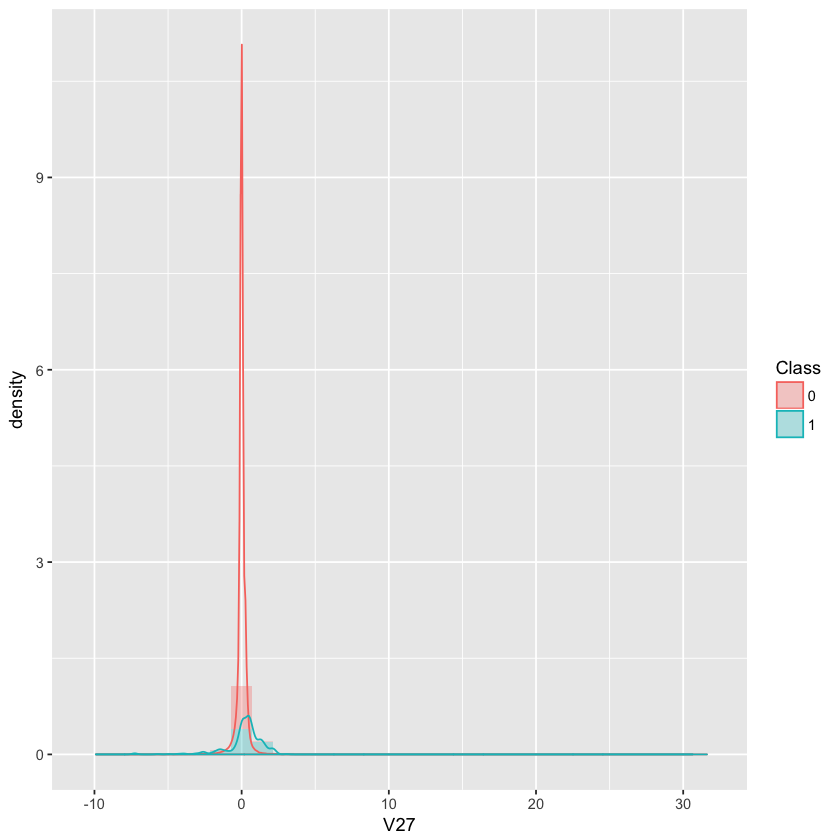

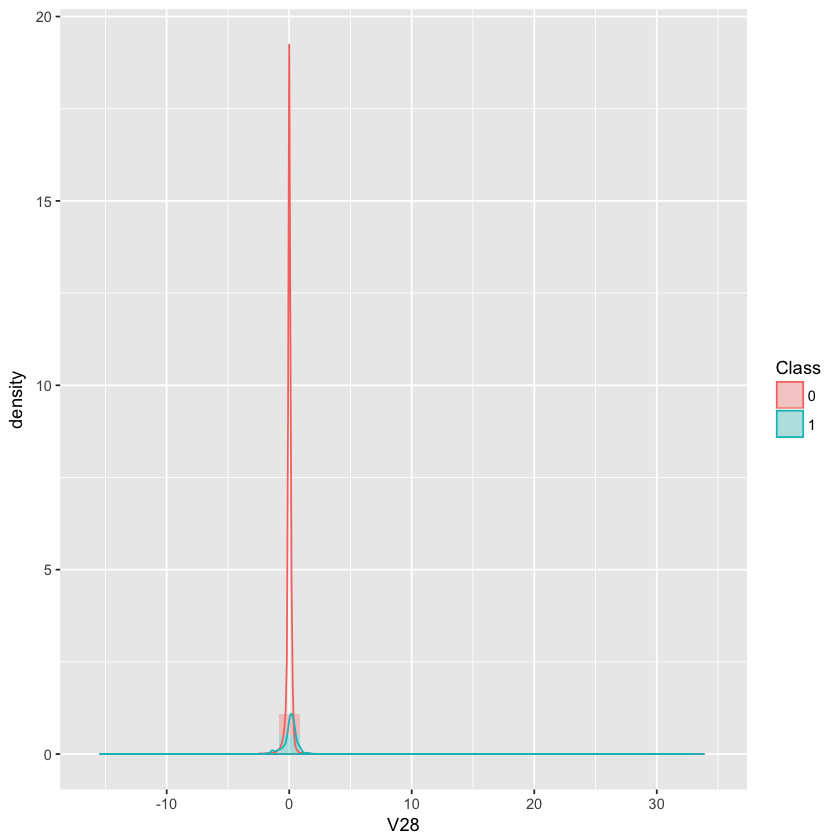

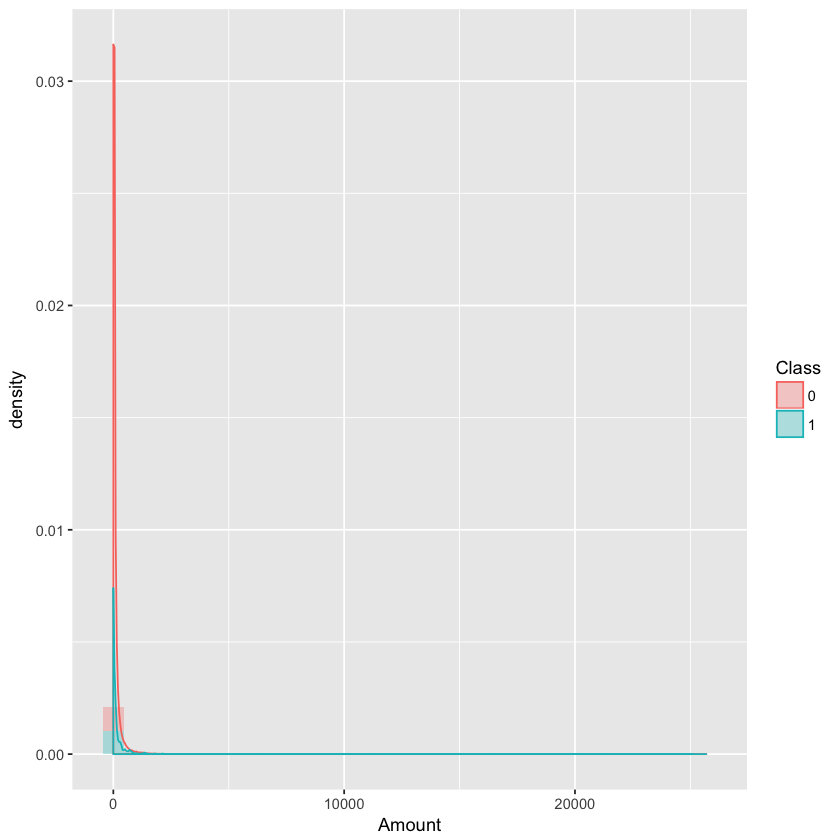

In [9]:
#Plot variable distrubution using ggplot2
for(col in names(df_train  %>% select(-Class))) {
    p <- ggplot(df_train, aes_string(col))
    print(p + 
            geom_histogram(aes(y = ..density.., fill = Class), bins = 30, alpha = 0.3) + 
            geom_density(aes(color = Class), alpha = 0))
}

**Based on the above graphs, we may drop a few variables from the dataset that have a similar distribution (for ease of computation - this step may not be required with deep learning models), as having these in the model would not have any significant addition in value**

In [10]:
#Drop variables with similar distribution
df_train <- df_train %>% 
    select(-V8,-V13,-V15,-V20,-V22,-V23,-V24,-V25,-V26,-V27,-V28)

df_test <- df_test %>% 
    select(-V8,-V13,-V15,-V20,-V22,-V23,-V24,-V25,-V26,-V27,-V28)

**Based on the distribution of variables across Fraudulent and normal transactions, we now create additional features that will help in training our models better**

In [11]:
df_train <- df_train %>% 
  mutate(A1 = ifelse(V1 < 2,1,0),
         A2 = ifelse(V2 > 1.5,1,0),
         A3 = ifelse(V3 < 2,1,0),
         A4 = ifelse(V4 > 2.5,1,0),
         A5 = ifelse(V5 < -1.7,1,0),
         A6 = ifelse(V6 < -1.7,1,0),
         A7 = ifelse(V7 < -1.8,1,0),
         A9 = ifelse(V9 < -2,1,0),
         A10 = ifelse(V10 < -1.5,1,0),
         A11 = ifelse(V11 > 2.5,1,0),
         A12 = ifelse(V12 < -2.5,1,0),
         A14 = ifelse(V14 < -1.5,1,0),
         A16 = ifelse(V16 < -2,1,0),
         A17 = ifelse(V17 < -1,1,0),
         A18 = ifelse(V18 < -2.5,1,0),
         A19 = ifelse(V19 > 2,1,0),
         A21 = ifelse(V21 > 0.7,1,0))

df_test <- df_test %>% 
  mutate(A1 = ifelse(V1 < 2,1,0),
         A2 = ifelse(V2 > 1.5,1,0),
         A3 = ifelse(V3 < 2,1,0),
         A4 = ifelse(V4 > 2.5,1,0),
         A5 = ifelse(V5 < -1.7,1,0),
         A6 = ifelse(V6 < -1.7,1,0),
         A7 = ifelse(V7 < -1.8,1,0),
         A9 = ifelse(V9 < -2,1,0),
         A10 = ifelse(V10 < -1.5,1,0),
         A11 = ifelse(V11 > 2.5,1,0),
         A12 = ifelse(V12 < -2.5,1,0),
         A14 = ifelse(V14 < -1.5,1,0),
         A16 = ifelse(V16 < -2,1,0),
         A17 = ifelse(V17 < -1,1,0),
         A18 = ifelse(V18 < -2.5,1,0),
         A19 = ifelse(V19 > 2,1,0),
         A21 = ifelse(V21 > 0.7,1,0))

**Let us visually check how our dependent variable is ditributed:**

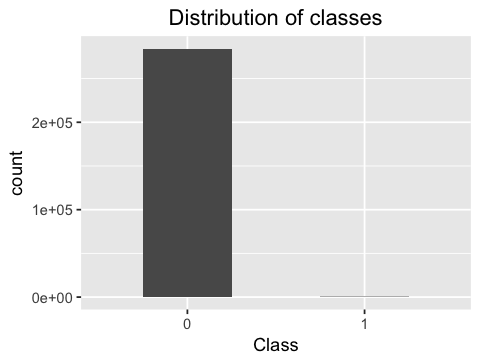

In [12]:
options(repr.plot.width=4, repr.plot.height=3)

ggplot(df) + 
  geom_bar(aes(x = Class), width = 0.5) + 
  ggtitle("Distribution of classes") + 
  theme(plot.title = element_text(hjust = 0.5))

It is clear that the class is highly imbalanced. Therefore, it would be necessary to resample the dataset in such a way that the classes are balanced. There are a few ways to go about this. One option is doing undersampling (remove instances from the majority class to make the dataset balanced) or oversampling (replicate instances from the minority class to make the dataset balanced).

## This is where mlr kicks in

### Over-sampling or under-sampling

#### Create classification task

In [13]:
#Create classification task
train_task <- makeClassifTask(data = df_train,
                             target = "Class")

#train_task <- oversample(train_task, rate = 10) #Oversample positive class by a ratio of 10
train_task <- undersample(train_task, rate = 1/100) #Undersample negative class by a ratio of 20

In [14]:
test_task <- makeClassifTask(data = df_test,
                            target = "Class")

In [15]:
table(train_task$env$data$Class) #See ratio of classes


   0    1 
2275  394 

#### Enable use of all CPU cores

In [16]:
#Enable parallel processing, after automatic detection of CPU cores
parallelStop()
parallelStartSocket(cpus = detectCores())

Starting parallelization in mode=socket with cpus=8.


#### 10-fold cross-validation

In [17]:
inner <- makeResampleDesc("CV", iters = 10)

Other resampling options:

- Cross-validation ("CV"),
- Leave-one-out cross-validation ("LOO"),
- Subsampling, also called Monte-Carlo cross-validation ("Subsample"),
- Holdout (training/test) ("Holdout")

#### Include cost sensitive classification

In [18]:
costs = matrix(c(0, 3, 5, 0), 2)
colnames(costs) = rownames(costs) = getTaskClassLevels(train_task)

threshold = costs[2,1]/(costs[2,1] + costs[1,2])

credit.costs = makeCostMeasure(id = "credit.costs", 
                               name = "Credit costs", 
                               costs = costs,
                               best = 0, 
                               worst = 5)

costs

0 1
0 0 5
1 3 0

### List other available learners for classification

In [19]:
listMeasures("classif")

[1] "kappa"            "multiclass.brier" "fn"               "fp"              
 [5] "multiclass.aunp"  "brier.scaled"     "multiclass.aunu"  "bac"             
 [9] "qsr"              "brier"            "tnr"              "fdr"             
[13] "gmean"            "auc"              "tpr"              "ber"             
[17] "logloss"          "ppv"              "wkappa"           "mcc"             
[21] "timeboth"         "timepredict"      "acc"              "lsr"             
[25] "featperc"         "multiclass.au1p"  "multiclass.au1u"  "gpr"             
[29] "tn"               "tp"               "ssr"              "fnr"             
[33] "f1"               "fpr"              "npv"              "timetrain"       
[37] "mmce"

-------------------

## Logistic Regression

In [20]:
lrn <- makeFeatSelWrapper(learner = makeLearner("classif.logreg", 
                                                predict.type = "response"),
                          resampling = inner,
                          control = makeFeatSelControlSequential(method = "sfs"), #Sequential forward selection
                          show.info = FALSE,
                          measures = credit.costs)

### Train the model

In [21]:
mod <- train(learner = lrn, 
             task = train_task)

Exporting objects to slaves for mode socket: .mlr.slave.options
Mapping in parallel: mode = socket; cpus = 8; elements = 10.
Exporting objects to slaves for mode socket: .mlr.slave.options
Mapping in parallel: mode = socket; cpus = 8; elements = 36.
Exporting objects to slaves for mode socket: .mlr.slave.options
Mapping in parallel: mode = socket; cpus = 8; elements = 35.
Exporting objects to slaves for mode socket: .mlr.slave.options
Mapping in parallel: mode = socket; cpus = 8; elements = 34.


### Make Predictions on test dataset

In [22]:
pred <- predict(mod, 
                test_task)

### Check accuracy and misclassification costs for predictions

In [23]:
performance(pred, measure = list(credit.costs,acc))

credit.costs          acc 
  0.02231351   0.99541792

### Create Confusion Matrix from predictions

In [24]:
calculateConfusionMatrix(pred)

        predicted
true         0   1 -err.-
  0      56619 244    244
  1         17  81     17
  -err.-    17 244    261

----------------------

## KNN 

In [31]:
knn_learn <- makeLearner("classif.kknn", predict.type = "response")

### Parameter tuning iterations

In [32]:
rancontrol <- makeTuneControlGrid() ##Complete grid search of all possible parameters.
set_cv <- makeResampleDesc("CV", iters = 10L)

### Set parameters of K-NN that needs to be tuned

In [33]:
knn_par <- makeParamSet(
  makeDiscreteParam("k", values = 5L:20L),
  makeDiscreteParam("distance", values = c(1L,2L))
)

#### Normalize features in the dataset

In [34]:
train_task_knn <- normalizeFeatures(train_task, method = "range") #Min-max normalization
test_task_knn <- normalizeFeatures(test_task, method = "range")

In [35]:
parallelStop()
parallelStartSocket(cpus = detectCores())

Stopped parallelization. All cleaned up.
Starting parallelization in mode=socket with cpus=8.


### Set type of grid search that needs to be carried out

In [36]:
rancontrol <- makeTuneControlGrid() ##Grid search

### Tune parameters

In [37]:
tune_knn <- tuneParams(learner = knn_learn, 
                       task = train_task_knn,
                       resampling = makeResampleDesc("CV", iters = 10),
                       measures = credit.costs,
                       par.set = knn_par,
                       control = rancontrol)

[Tune] Started tuning learner classif.kknn for parameter set:
             Type len Def                                   Constr Req Tunable
k        discrete   -   - 5,6,7,8,9,10,11,12,13,14,15,16,17,18,...   -    TRUE
distance discrete   -   -                                      1,2   -    TRUE
         Trafo
k            -
distance     -
With control class: TuneControlGrid
Imputation value: 5
Exporting objects to slaves for mode socket: .mlr.slave.options
Mapping in parallel: mode = socket; cpus = 8; elements = 32.
[Tune] Result: k=18; distance=1 : credit.costs.test.mean=0.0581


### Train the model with the selected parameters

In [38]:
final_knn <- setHyperPars(learner = knn_learn, par.vals = tune_knn$x)
to.knn <- train(final_knn, train_task_knn)

### Make predictions on the validation set

In [39]:
pred <- predict(to.knn, test_task_knn)

### Performance measures

In [40]:
performance(pred, measures = list(credit.costs,acc))
calculateConfusionMatrix(pred)

credit.costs          acc 
  0.03149523   0.99360966

        predicted
true         0   1 -err.-
  0      56512 351    351
  1         13  85     13
  -err.-    13 351    364

------------------------

## Random Forest

In [41]:
rf_learn <- makeLearner(cl = "classif.randomForest", 
                         predict.type = "response")

rancontrol <- makeTuneControlRandom(maxit = 50L)
set_cv <- makeResampleDesc("CV", iters = 10L)

#Define grid search parameters
rf_par <- makeParamSet(
  makeDiscreteParam("ntree", values = seq(100,500,20))
)

set.seed(42)

#Enable parallel processing, after automatic detection of CPU cores
parallelStop()
parallelStartMulticore(cpus = detectCores())

#Tune parameters
tune_rf <- tuneParams(learner = rf_learn, 
                       task = train_task,
                       resampling = set_cv,
                       measures = credit.costs,
                       par.set = rf_par,
                       control = rancontrol)

final_rf <- setHyperPars(learner = rf_learn, par.vals = tune_rf$x)
to.rf <- train(final_rf, train_task)

#Make predictions
rfpred <- predict(to.rf, test_task)

#Performance measures
performance(rfpred, measures = list(credit.costs,acc))
calculateConfusionMatrix(rfpred)

Stopped parallelization. All cleaned up.
Starting parallelization in mode=multicore with cpus=8.
[Tune] Started tuning learner classif.randomForest for parameter set:
          Type len Def                                   Constr Req Tunable
ntree discrete   -   - 100,120,140,160,180,200,220,240,260,2...   -    TRUE
      Trafo
ntree     -
With control class: TuneControlRandom
Imputation value: 5
Mapping in parallel: mode = multicore; cpus = 8; elements = 50.
[Tune] Result: ntree=380 : credit.costs.test.mean=0.0626


credit.costs          acc 
  0.02039992   0.99582170

        predicted
true         0   1 -err.-
  0      56639 224    224
  1         14  84     14
  -err.-    14 224    238

##### ROC Analysis

In [42]:
rf_learn <- makeLearner(cl = "classif.randomForest", 
                         predict.type = "prob")

final_rf <- setHyperPars(learner = rf_learn, par.vals = tune_rf$x)
to.rf <- train(final_rf, train_task)
rfpred <- predict(to.rf, test_task)

df <- generateThreshVsPerfData(rfpred, measures = list(fpr, tpr, credit.costs))

##### Plot ROC curve

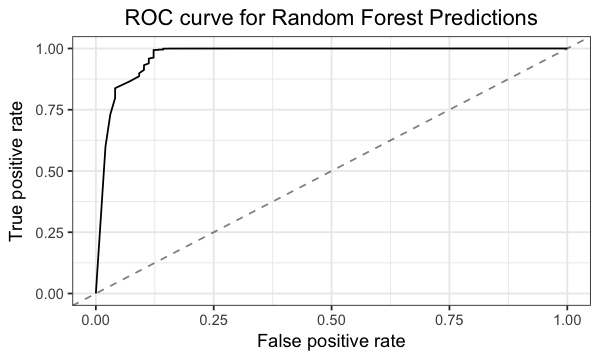

In [43]:
options(repr.plot.width=5, repr.plot.height=3)

plotROCCurves(df) + 
  ggtitle("ROC curve for Random Forest Predictions") + 
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

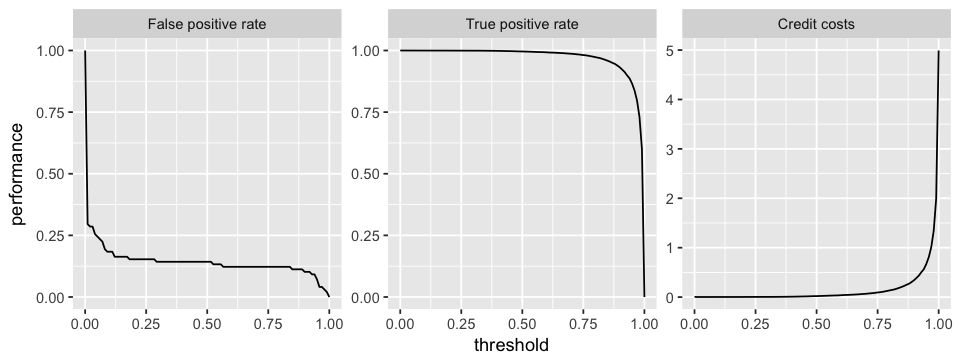

In [44]:
options(repr.plot.width=8, repr.plot.height=3)

plotThreshVsPerf(df)

In [45]:
performance(rfpred, measures = auc)

auc 
0.9716028

In [46]:
head(df$data)

fpr       tpr       credit.costs threshold 
1 1.0000000 1.0000000 0.005161426  0.00000000
2 0.2959184 0.9998769 0.002141816  0.01010101
3 0.2857143 0.9998769 0.002089149  0.02020202
4 0.2857143 0.9998593 0.002176928  0.03030303
5 0.2551020 0.9998241 0.002194484  0.04040404
6 0.2448980 0.9998066 0.002229596  0.05050505

## Gradient Boosted Models

In [47]:
gbm_learn <- makeLearner(cl = "classif.gbm", 
                         predict.type = "response")

rancontrol <- makeTuneControlRandom(maxit = 50L)
set_cv <- makeResampleDesc("CV", iters = 10L)

#Define grid search parameters
gbm_par <- makeParamSet(
  makeIntegerParam("n.trees", lower = 100, upper = 500), #number of trees
  makeIntegerParam("interaction.depth", lower = 2, upper = 10), #depth of tree
  makeIntegerParam("n.minobsinnode", lower = 10, upper = 15),
  makeNumericParam("shrinkage",lower = 0.01, upper = 1)
)

set.seed(42)
#Enable parallel processing, after automatic detection of CPU cores
parallelStop()
parallelStartSocket(cpus = detectCores())

#Tune parameters
tune_gbm <- tuneParams(learner = gbm_learn, 
                       task = train_task,
                       resampling = set_cv,
                       measures = credit.costs,
                       par.set = gbm_par,
                       control = rancontrol)

final_gbm <- setHyperPars(learner = gbm_learn, 
                          par.vals = tune_gbm$x)

to.gbm <- train(final_gbm, train_task)

#Make predictions
gbpred <- predict(to.gbm, test_task)

#Performace measure
performance(gbpred, measures = list(credit.costs,acc))
calculateConfusionMatrix(gbpred)

Stopped parallelization. All cleaned up.
Starting parallelization in mode=socket with cpus=8.
[Tune] Started tuning learner classif.gbm for parameter set:
                     Type len Def     Constr Req Tunable Trafo
n.trees           integer   -   - 100 to 500   -    TRUE     -
interaction.depth integer   -   -    2 to 10   -    TRUE     -
n.minobsinnode    integer   -   -   10 to 15   -    TRUE     -
shrinkage         numeric   -   -  0.01 to 1   -    TRUE     -
With control class: TuneControlRandom
Imputation value: 5
Exporting objects to slaves for mode socket: .mlr.slave.options
Mapping in parallel: mode = socket; cpus = 8; elements = 50.
[Tune] Result: n.trees=112; interaction.depth=10; n.minobsinnode=14; shrinkage=0.175 : credit.costs.test.mean=0.0716


Distribution not specified, assuming bernoulli ...


credit.costs          acc 
   0.0236302    0.9951897

        predicted
true         0   1 -err.-
  0      56601 262    262
  1         12  86     12
  -err.-    12 262    274

## XGBoost

In [48]:
#Define the learner
lrn <- makeLearner(cl = "classif.xgboost", predict.type = "response")

#Define grid search parameters
params <- makeParamSet(
         makeIntegerParam("max_depth",lower = 3L,upper = 10L),
         makeIntegerParam("min_child_weight",lower = 1L,upper = 10L),
         makeDiscreteParam("subsample",values = seq(0.5,1,0.1)),
         makeDiscreteParam("colsample_bytree",values = seq(0.5,1,0.1)),
         makeDiscreteParam("eta", values = seq(0.01,0.1,0.01)),
         makeDiscreteParam("nrounds", values = seq(100L, 1000L, by = 50L))
)

#Set type of resampling
rdesc <- makeResampleDesc("CV", iters = 10L)
ctrl <- makeTuneControlRandom(maxit = 50L)

set.seed(42)

#Enable parallel processing, after automatic detection of CPU cores
parallelStop()
parallelStartSocket(cpus = detectCores())

#lrn$par.vals <- list(
#               objective= "classif:linear",
#               eval_metric= "mae")
  
mytune <- tuneParams(learner = lrn,
               task = train_task,
               resampling = rdesc,
               measures = credit.costs,
               par.set = params,
               control = ctrl,
               show.info = TRUE)

#Set parameters as defined by grid search in previous step
lrn_tune <- setHyperPars(lrn,
                         par.vals = mytune$x,
                         print_every_n = 100)

#Fit the X-gradient boosted model
set.seed(42)

xgmodel <- train(learner = lrn_tune,
                 task = train_task)

#Make predictions on validation set
xgpred <- predict(xgmodel,test_task)

#Performance measures
performance(xgpred, measures = list(credit.costs,acc))
calculateConfusionMatrix(xgpred)

Stopped parallelization. All cleaned up.
Starting parallelization in mode=socket with cpus=8.
[Tune] Started tuning learner classif.xgboost for parameter set:
                     Type len Def                                   Constr Req
max_depth         integer   -   -                                  3 to 10   -
min_child_weight  integer   -   -                                  1 to 10   -
subsample        discrete   -   -                    0.5,0.6,0.7,0.8,0.9,1   -
colsample_bytree discrete   -   -                    0.5,0.6,0.7,0.8,0.9,1   -
eta              discrete   -   - 0.01,0.02,0.03,0.04,0.05,0.06,0.07,0....   -
nrounds          discrete   -   - 100,150,200,250,300,350,400,450,500,5...   -
                 Tunable Trafo
max_depth           TRUE     -
min_child_weight    TRUE     -
subsample           TRUE     -
colsample_bytree    TRUE     -
eta                 TRUE     -
nrounds             TRUE     -
With control class: TuneControlRandom
Imputation value: 5
Exporting obj

credit.costs          acc 
  0.02770317   0.99438212

        predicted
true         0   1 -err.-
  0      56554 309    309
  1         11  87     11
  -err.-    11 309    320

In [49]:
xg_learn_prob <- makeLearner(cl = "classif.xgboost", 
                         predict.type = "prob")

final_xgb_prob <- setHyperPars(learner = xg_learn_prob, par.vals = mytune$x)
to.xgb <- train(final_xgb_prob, train_task)
xgpred_probs <- predict(to.xgb, test_task)

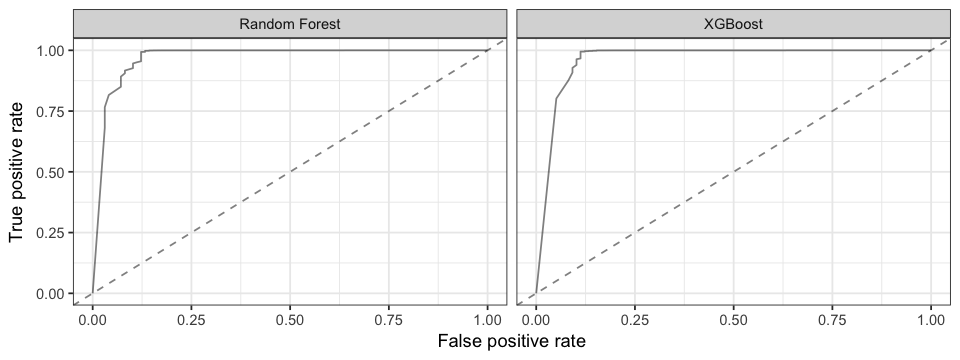

In [77]:
df2 <- generateThreshVsPerfData(list(`Random Forest` = rfpred, 
                                     `XGBoost` = xgpred_probs), 
                                measures = list(fpr, tpr))

plotROCCurves(df2) + 
  theme_bw() 